In [171]:
%load_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Testing out plots of labels vs predictions for different thresholds

In [251]:
import os
import sys
import pandas as pd

sys.path.append(os.path.join(".."))

import plot.pyplot as plt
import util
from database.CERNMongoClient import CERNMongoClient
from pipeline import pipeline
from preprocessing import feature_extraction
import plot.evaluation

%autoreload 2

In [287]:
df = feature_extraction.load_features_from_file(beam=1)
db = CERNMongoClient()
labels = db.query_elogbook_anomalies(beam=1)
labels_all = db.query_elogbook_any(beam=1)

Loading file '../../data-cern/features-b1-sw_10min'.
File not found, loading '../../data-cern/features-b1-sw_10min-2018_10_21.csv' instead.

Fetching data for pattern MKI.ELOGBOOK_tagged from 2015-06-22 00:00:00 to 2016-09-14 00:00:00

Fetching data for pattern MKI.ELOGBOOK_tagged from 2015-06-22 00:00:00 to 2016-09-14 00:00:00



## Execute pipeline and get results

|| GaussianMixture(covariance_type='tied', init_params='random', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=1,
        verbose_interval=10, warm_start=False, weights_init=None)
|| scale_data = True
Initialization 0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


  Iteration 0
Initialization converged: True
|| Trained detector and scored features: 1.1 seconds
|| Created 1322 segments: 1.2 seconds
|| Created results DataFrame: 1.0 seconds


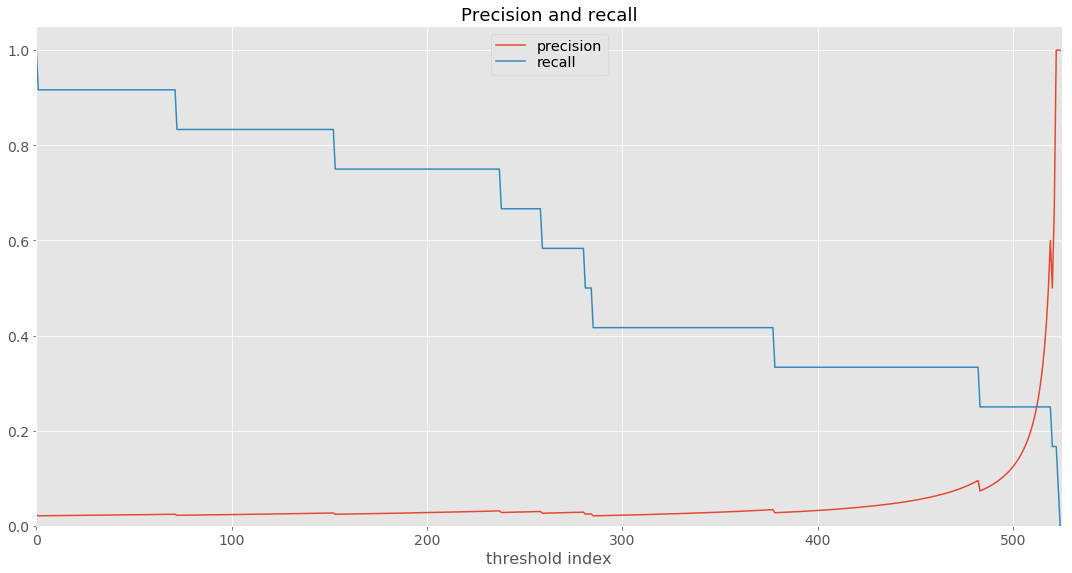

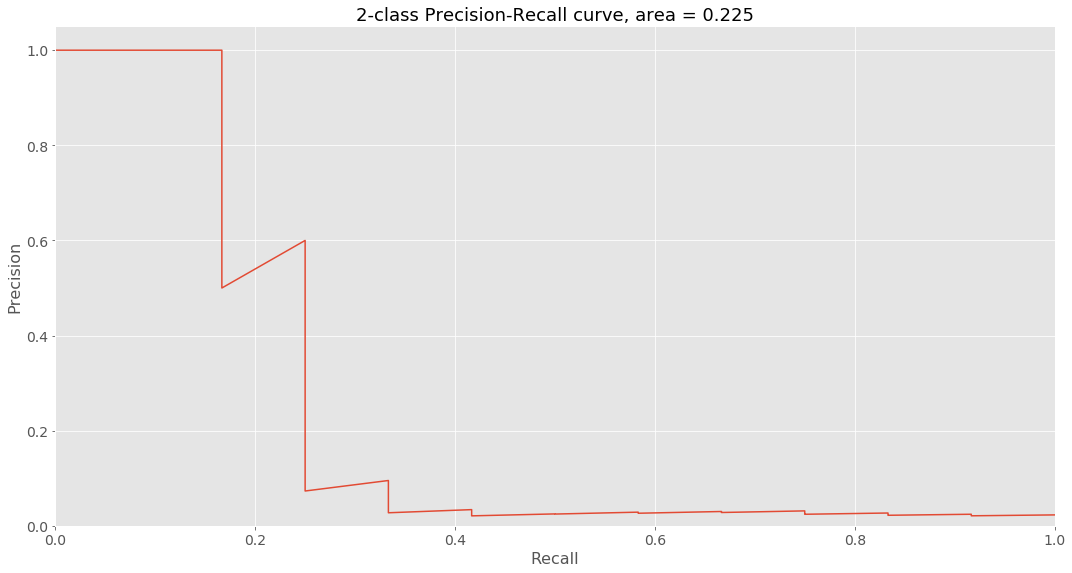

||| PR-curve tresholds: 524, min: 0.00, max: 1.00
||| Area under PR curve = 0.2252152088963306
|| PR and Area calculation: 0.8 seconds
|| Pipeline execution time: 4.1 seconds


In [4]:
truth_and_pred_df, auc, precision, recall, thresholds, execution_time = pipeline.pipeline(
    features=df, 
    labels=labels, 
    anomaly_detector="gmm", 
    detector_parameters={
        "n_components": 2,
        "covariance_type": "tied",
        "tol": 1e-3,
        "reg_covar": 1e-6,
        "max_iter": 100,
        "n_init": 1,
        "init_params": 'random',
        "weights_init": None,
        "means_init": None,
        "precisions_init": None,
        "random_state": None,
        "warm_start": False,
        "verbose": 1,
        "verbose_interval": 10
    }, 
    scale_data=True, 
    verbose=True, 
    show_figures=True
)

## Plot labels vs. anomalies over time and plot them over some features

MAKING PREDICTIONS FOR THRESHOLD: 0.0211513420755501
TP:     3 | FP:    11  || sum:   14
FN:     9 | TN:  1283  || sum: 1292
PRECISION: 0.21, RECALL: 0.25



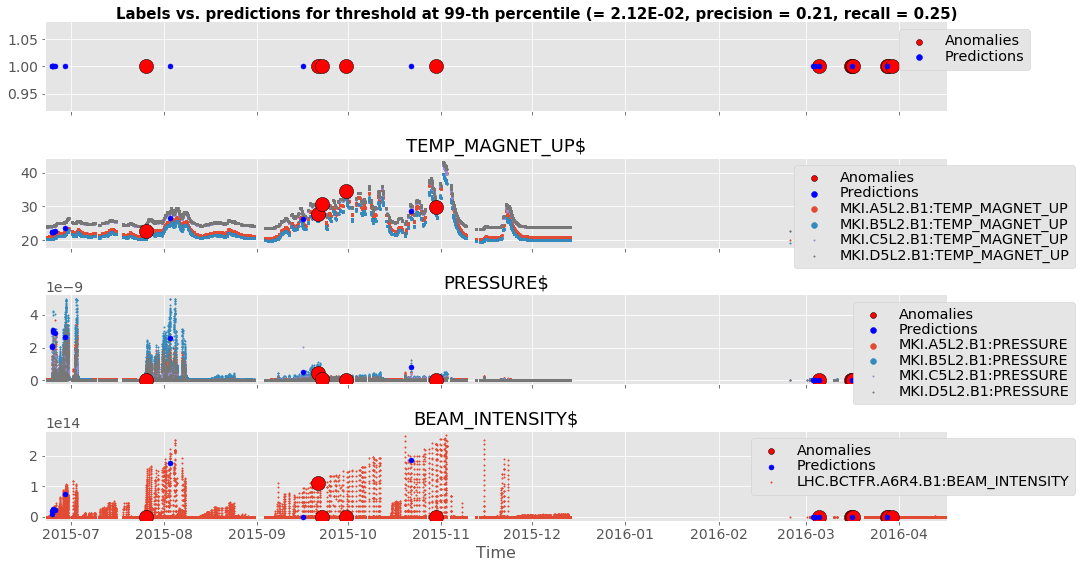

MAKING PREDICTIONS FOR THRESHOLD: 0.014907984915813535
TP:     3 | FP:    24  || sum:   27
FN:     9 | TN:  1270  || sum: 1279
PRECISION: 0.11, RECALL: 0.25



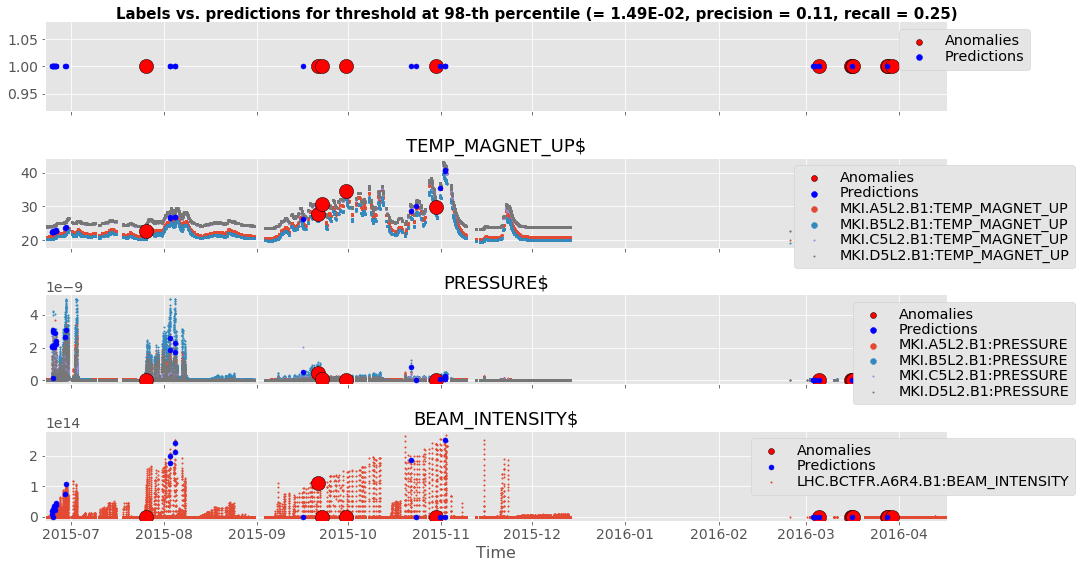

MAKING PREDICTIONS FOR THRESHOLD: 0.008117513431990707
TP:     4 | FP:    62  || sum:   66
FN:     8 | TN:  1232  || sum: 1240
PRECISION: 0.06, RECALL: 0.33



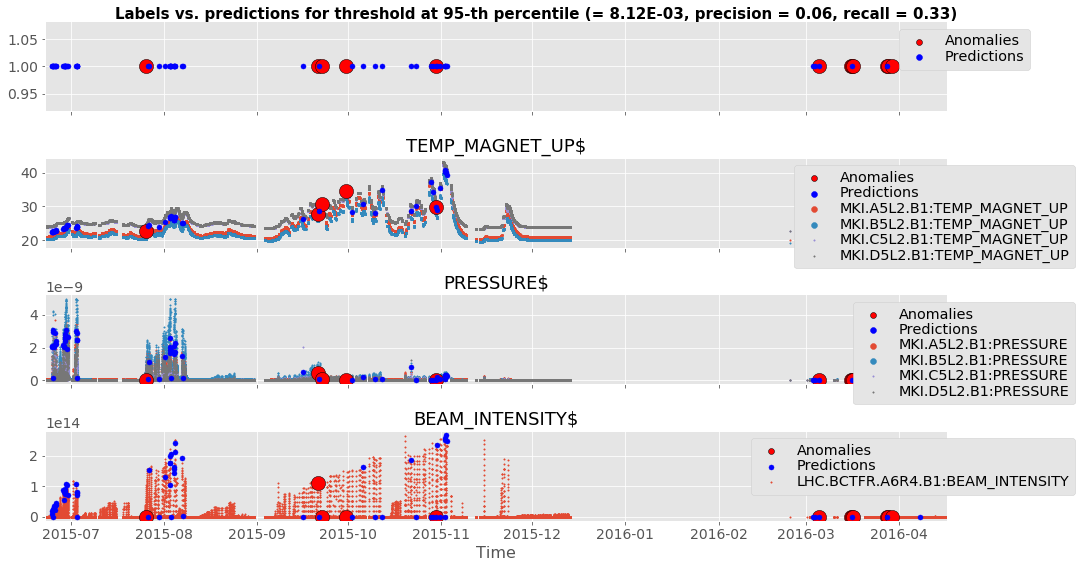

In [5]:
plot.evaluation.labels_vs_predictions_for_different_thresholds(
    truth_and_pred_df=truth_and_pred_df, 
    features=df, 
    feature_regexes=["TEMP_MAGNET_UP$", "PRESSURE$", "BEAM_INTENSITY$"]
)

### Make plots for 2015 and 2016 to avoid the big gap so we can see more details

MAKING PREDICTIONS FOR THRESHOLD: 0.019852907060053725
TP:     0 | FP:    11  || sum:   11
FN:     5 | TN:  1070  || sum: 1075
PRECISION: 0.00, RECALL: 0.00



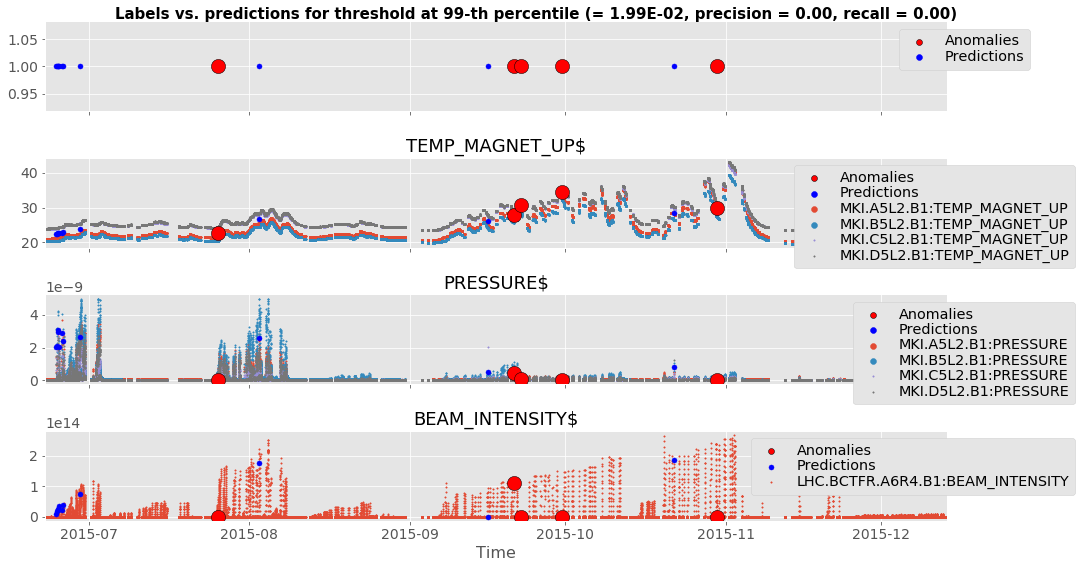

MAKING PREDICTIONS FOR THRESHOLD: 0.014703658288704475
TP:     0 | FP:    22  || sum:   22
FN:     5 | TN:  1059  || sum: 1064
PRECISION: 0.00, RECALL: 0.00



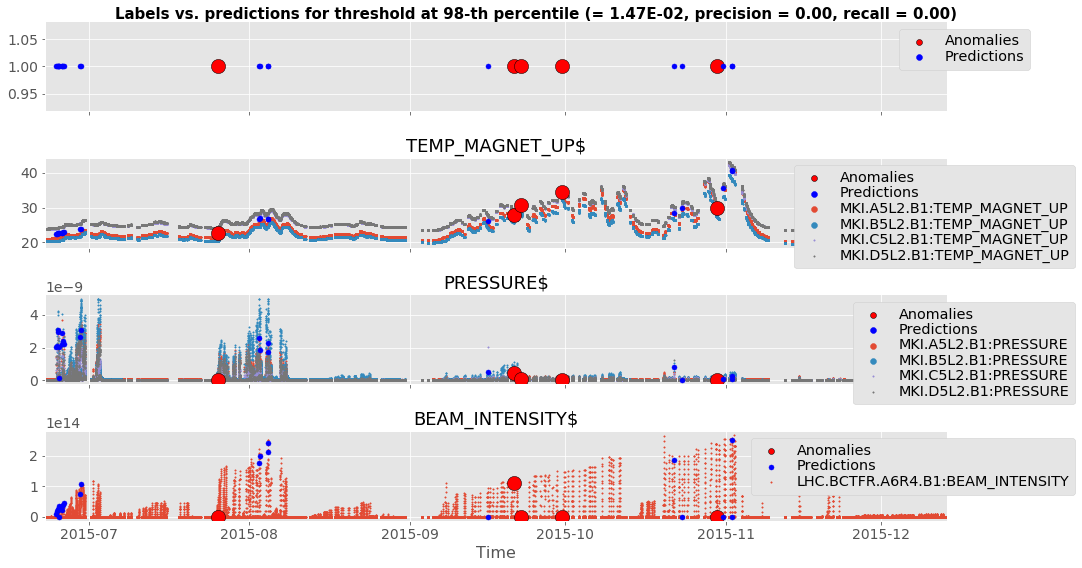

MAKING PREDICTIONS FOR THRESHOLD: 0.008304498525908841
TP:     1 | FP:    54  || sum:   55
FN:     4 | TN:  1027  || sum: 1031
PRECISION: 0.02, RECALL: 0.20



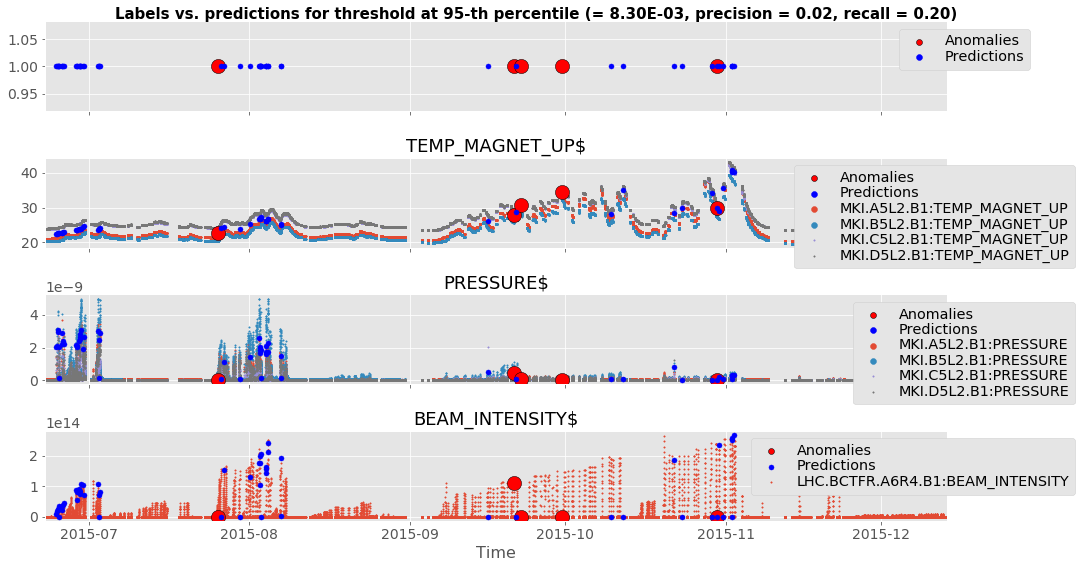

In [8]:
plot.evaluation.labels_vs_predictions_for_different_thresholds(
    truth_and_pred_df=truth_and_pred_df[truth_and_pred_df.timestamp < pd.Timestamp("2015-12-31")], 
    features=df[:"2015-12-31"], 
    feature_regexes=["TEMP_MAGNET_UP$", "PRESSURE$", "BEAM_INTENSITY$"]
)

MAKING PREDICTIONS FOR THRESHOLD: 0.3396463810875824
TP:     2 | FP:     1  || sum:    3
FN:     5 | TN:   212  || sum:  217
PRECISION: 0.67, RECALL: 0.29



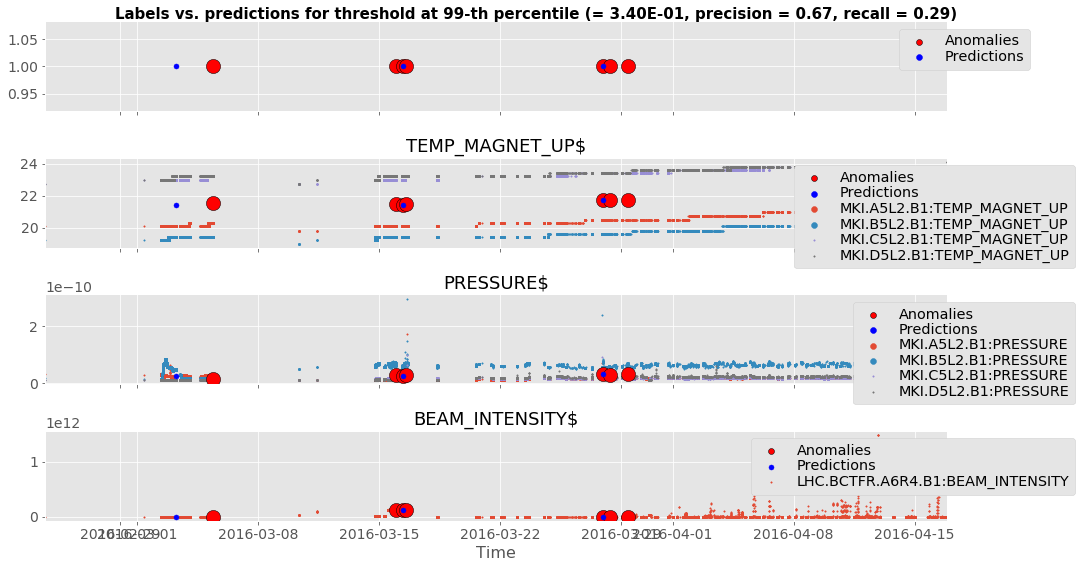

MAKING PREDICTIONS FOR THRESHOLD: 0.1836245575263507
TP:     3 | FP:     2  || sum:    5
FN:     4 | TN:   211  || sum:  215
PRECISION: 0.60, RECALL: 0.43



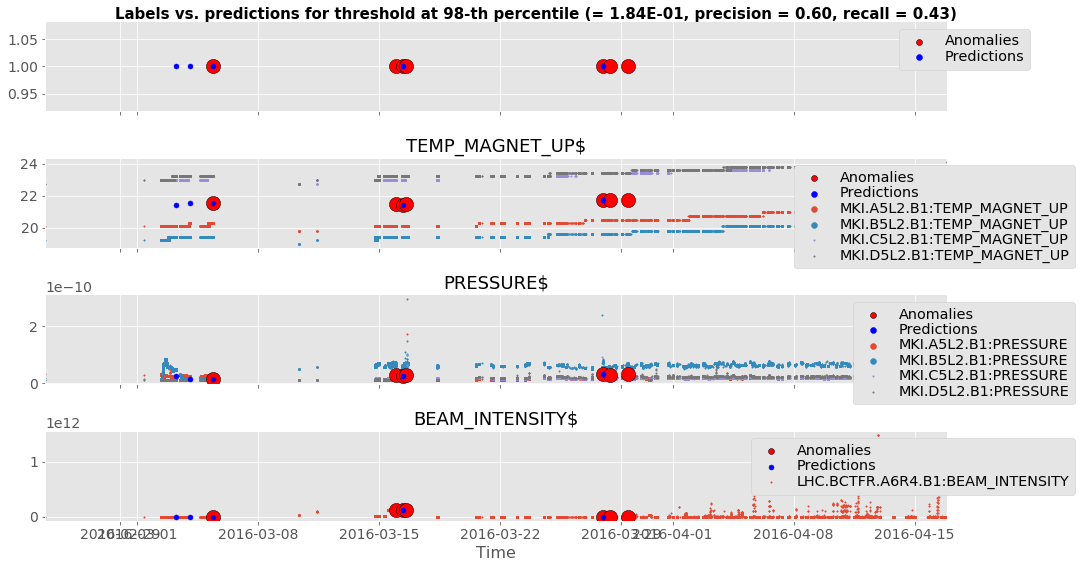

MAKING PREDICTIONS FOR THRESHOLD: 0.00344223710451977
TP:     3 | FP:     8  || sum:   11
FN:     4 | TN:   205  || sum:  209
PRECISION: 0.27, RECALL: 0.43



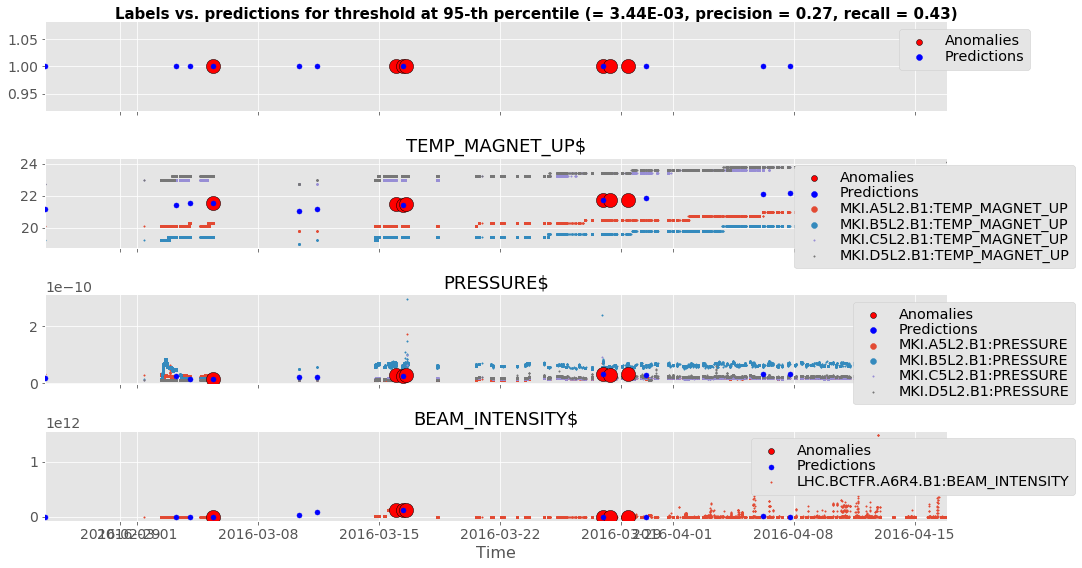

In [9]:
plot.evaluation.labels_vs_predictions_for_different_thresholds(
    truth_and_pred_df=truth_and_pred_df[truth_and_pred_df.timestamp > pd.Timestamp("2015-12-31")], 
    features=df["2015-12-31":], 
    feature_regexes=["TEMP_MAGNET_UP$", "PRESSURE$", "BEAM_INTENSITY$"]
)

## The same with Isolation Forest

|| IsolationForest(bootstrap=False, contamination=0.01, max_features=1.0,
        max_samples=1280, n_estimators=200, n_jobs=-1, random_state=None,
        verbose=1)
|| scale_data = True


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    3.3s remaining:    9.9s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    4.1s finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


|| Trained detector and scored features: 27.7 seconds
|| Created 1322 segments: 1.2 seconds
|| Created results DataFrame: 1.0 seconds


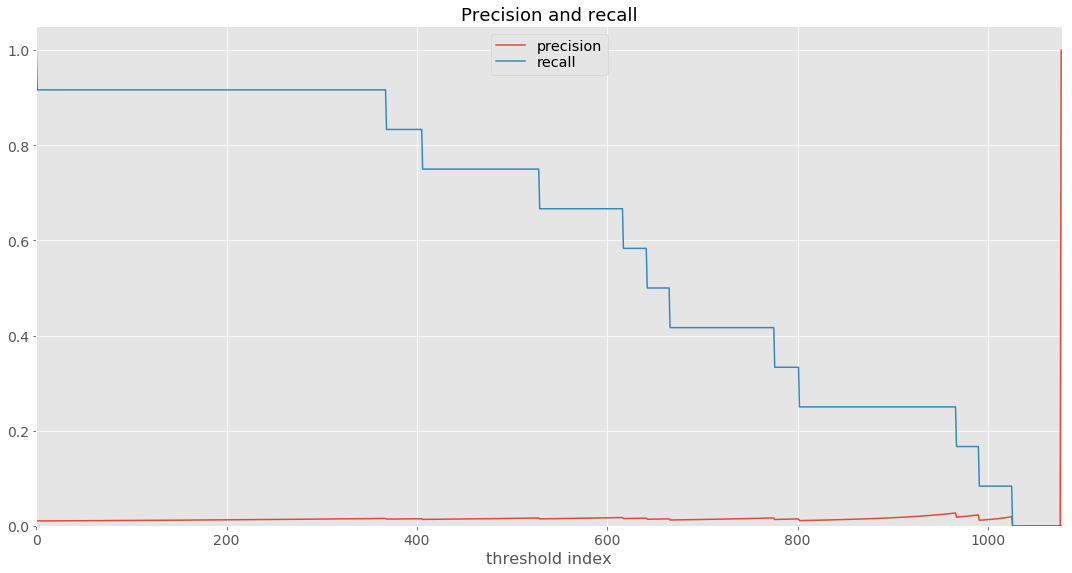

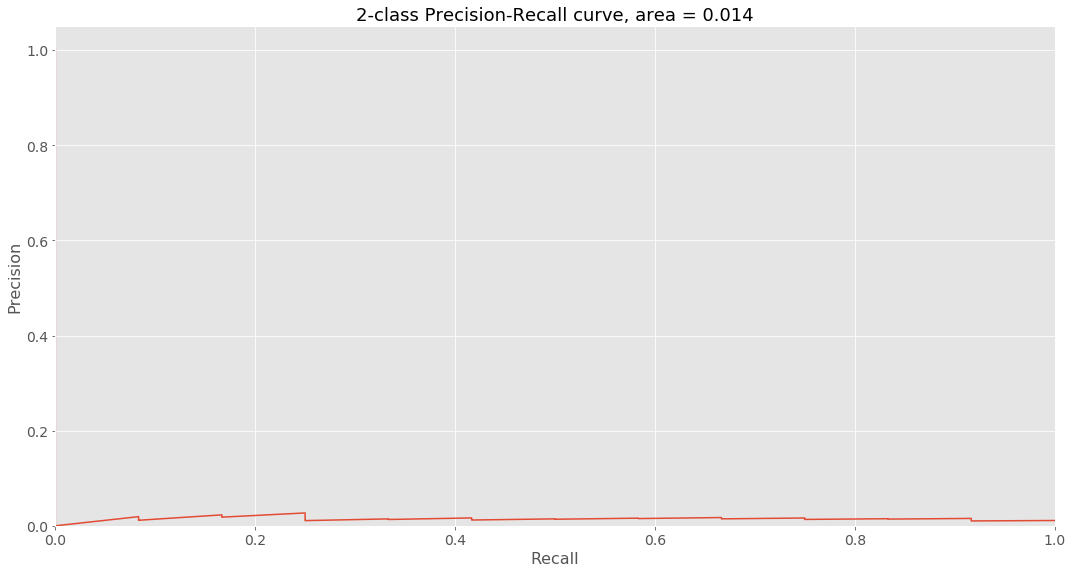

||| PR-curve tresholds: 1077, min: 0.24, max: 1.00
||| Area under PR curve = 0.014339238173319092
|| PR and Area calculation: 0.7 seconds
|| Pipeline execution time: 30.7 seconds


In [10]:
truth_and_pred_df, auc, precision, recall, thresholds, execution_time = pipeline.pipeline(
    features=df, 
    labels=labels, 
    anomaly_detector="isolation_forest", 
    detector_parameters={
        "n_estimators": 200,
        "max_samples": 1280,
        "max_features": 1.,
        "bootstrap": False,
        "n_jobs": -1,
        "random_state": None,
        "verbose": 1  # 0, 1, or 2
    }, 
    scale_data=True, 
    verbose=True, 
    show_figures=True
)

MAKING PREDICTIONS FOR THRESHOLD: 0.7947781674897041
TP:     0 | FP:    14  || sum:   14
FN:    12 | TN:  1280  || sum: 1292
PRECISION: 0.00, RECALL: 0.00



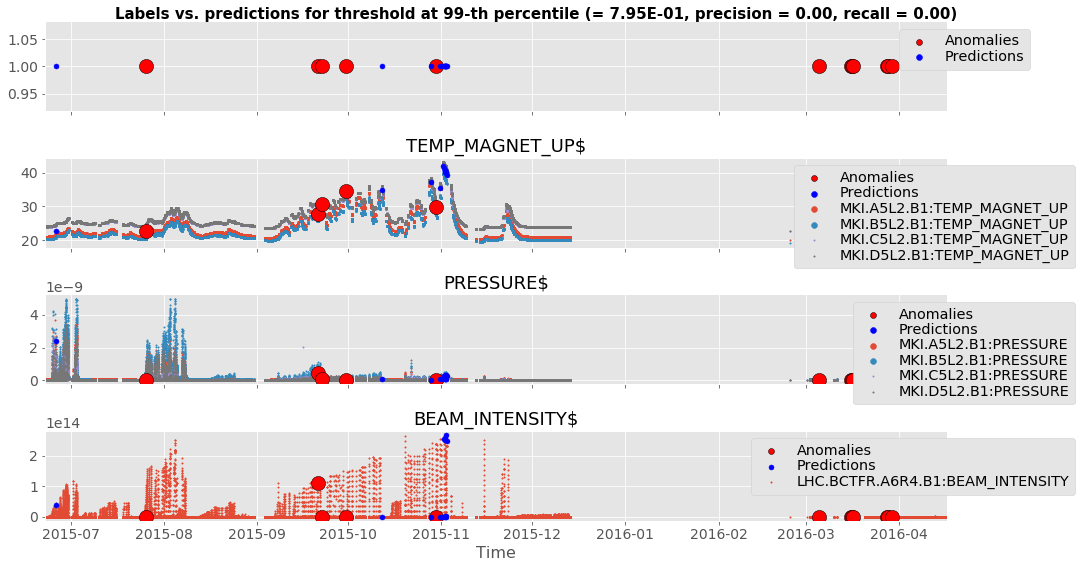

MAKING PREDICTIONS FOR THRESHOLD: 0.7391424443922723
TP:     0 | FP:    27  || sum:   27
FN:    12 | TN:  1267  || sum: 1279
PRECISION: 0.00, RECALL: 0.00



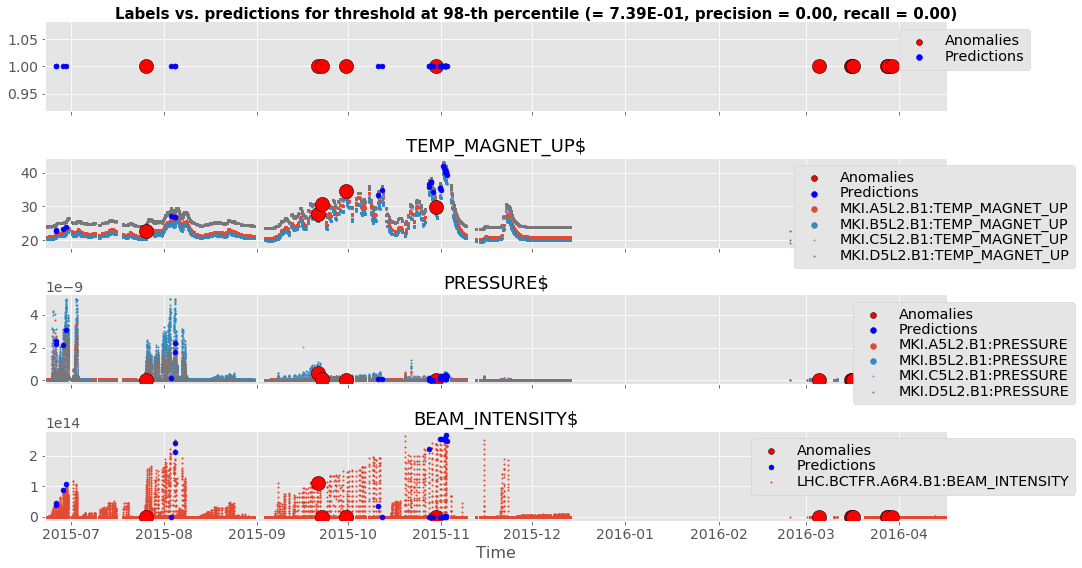

MAKING PREDICTIONS FOR THRESHOLD: 0.6634951294373109
TP:     1 | FP:    65  || sum:   66
FN:    11 | TN:  1229  || sum: 1240
PRECISION: 0.02, RECALL: 0.08



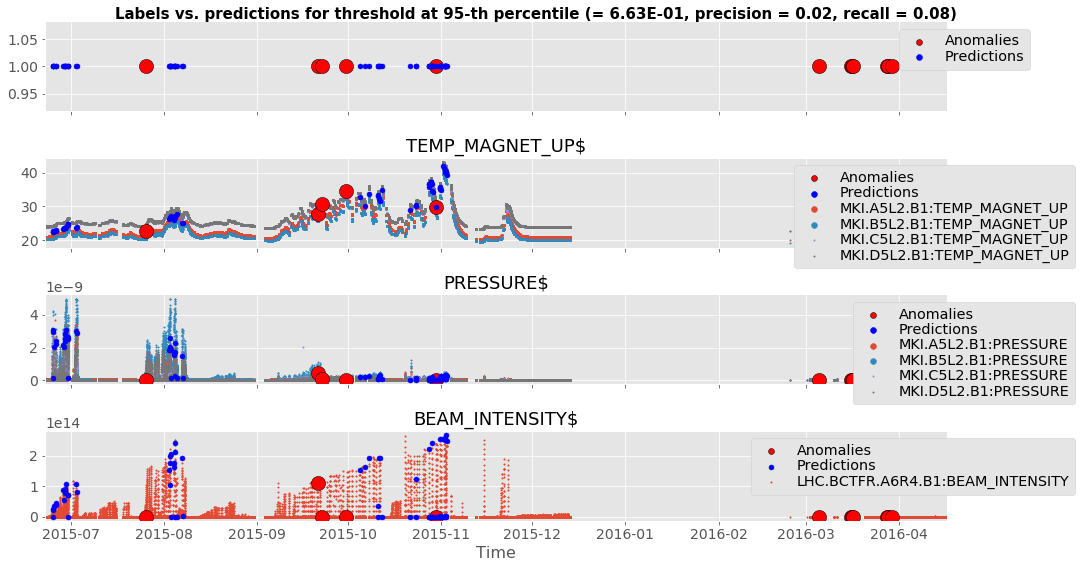

In [11]:
plot.evaluation.labels_vs_predictions_for_different_thresholds(
    truth_and_pred_df=truth_and_pred_df, 
    features=df, 
    feature_regexes=["TEMP_MAGNET_UP$", "PRESSURE$", "BEAM_INTENSITY$"]
)

## Verifying that labels vs. anomalies are plotted for best results in grid search

In [ ]:
results = pipeline.grid_search(
    features=df,
    labels=labels,
    anomaly_detector="gmm",
    detector_parameters={
        "n_components": [1, 2, 3],
        "covariance_type": ["tied"],
        "n_init": [1, 3],
        "init_params": ["kmeans"],
        "verbose": [1]
    },
    scale_data=True,
    segmentation_distance=30,
    anomaly_score_method=["max", "top_k", "top_percentage"], 
    verbose=True,
    show_figures=True,
    fig_filename_func=lambda x1, x2, x3, x4, x5:"180520-grid-search-test",
)